**Section I: Import the Data**

Imports and Read in File

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

In [4]:
seeds = pd.read_csv("../assets/datasets/seeds.csv")

In [5]:
# Taking a peek
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


**Section II: EDA**

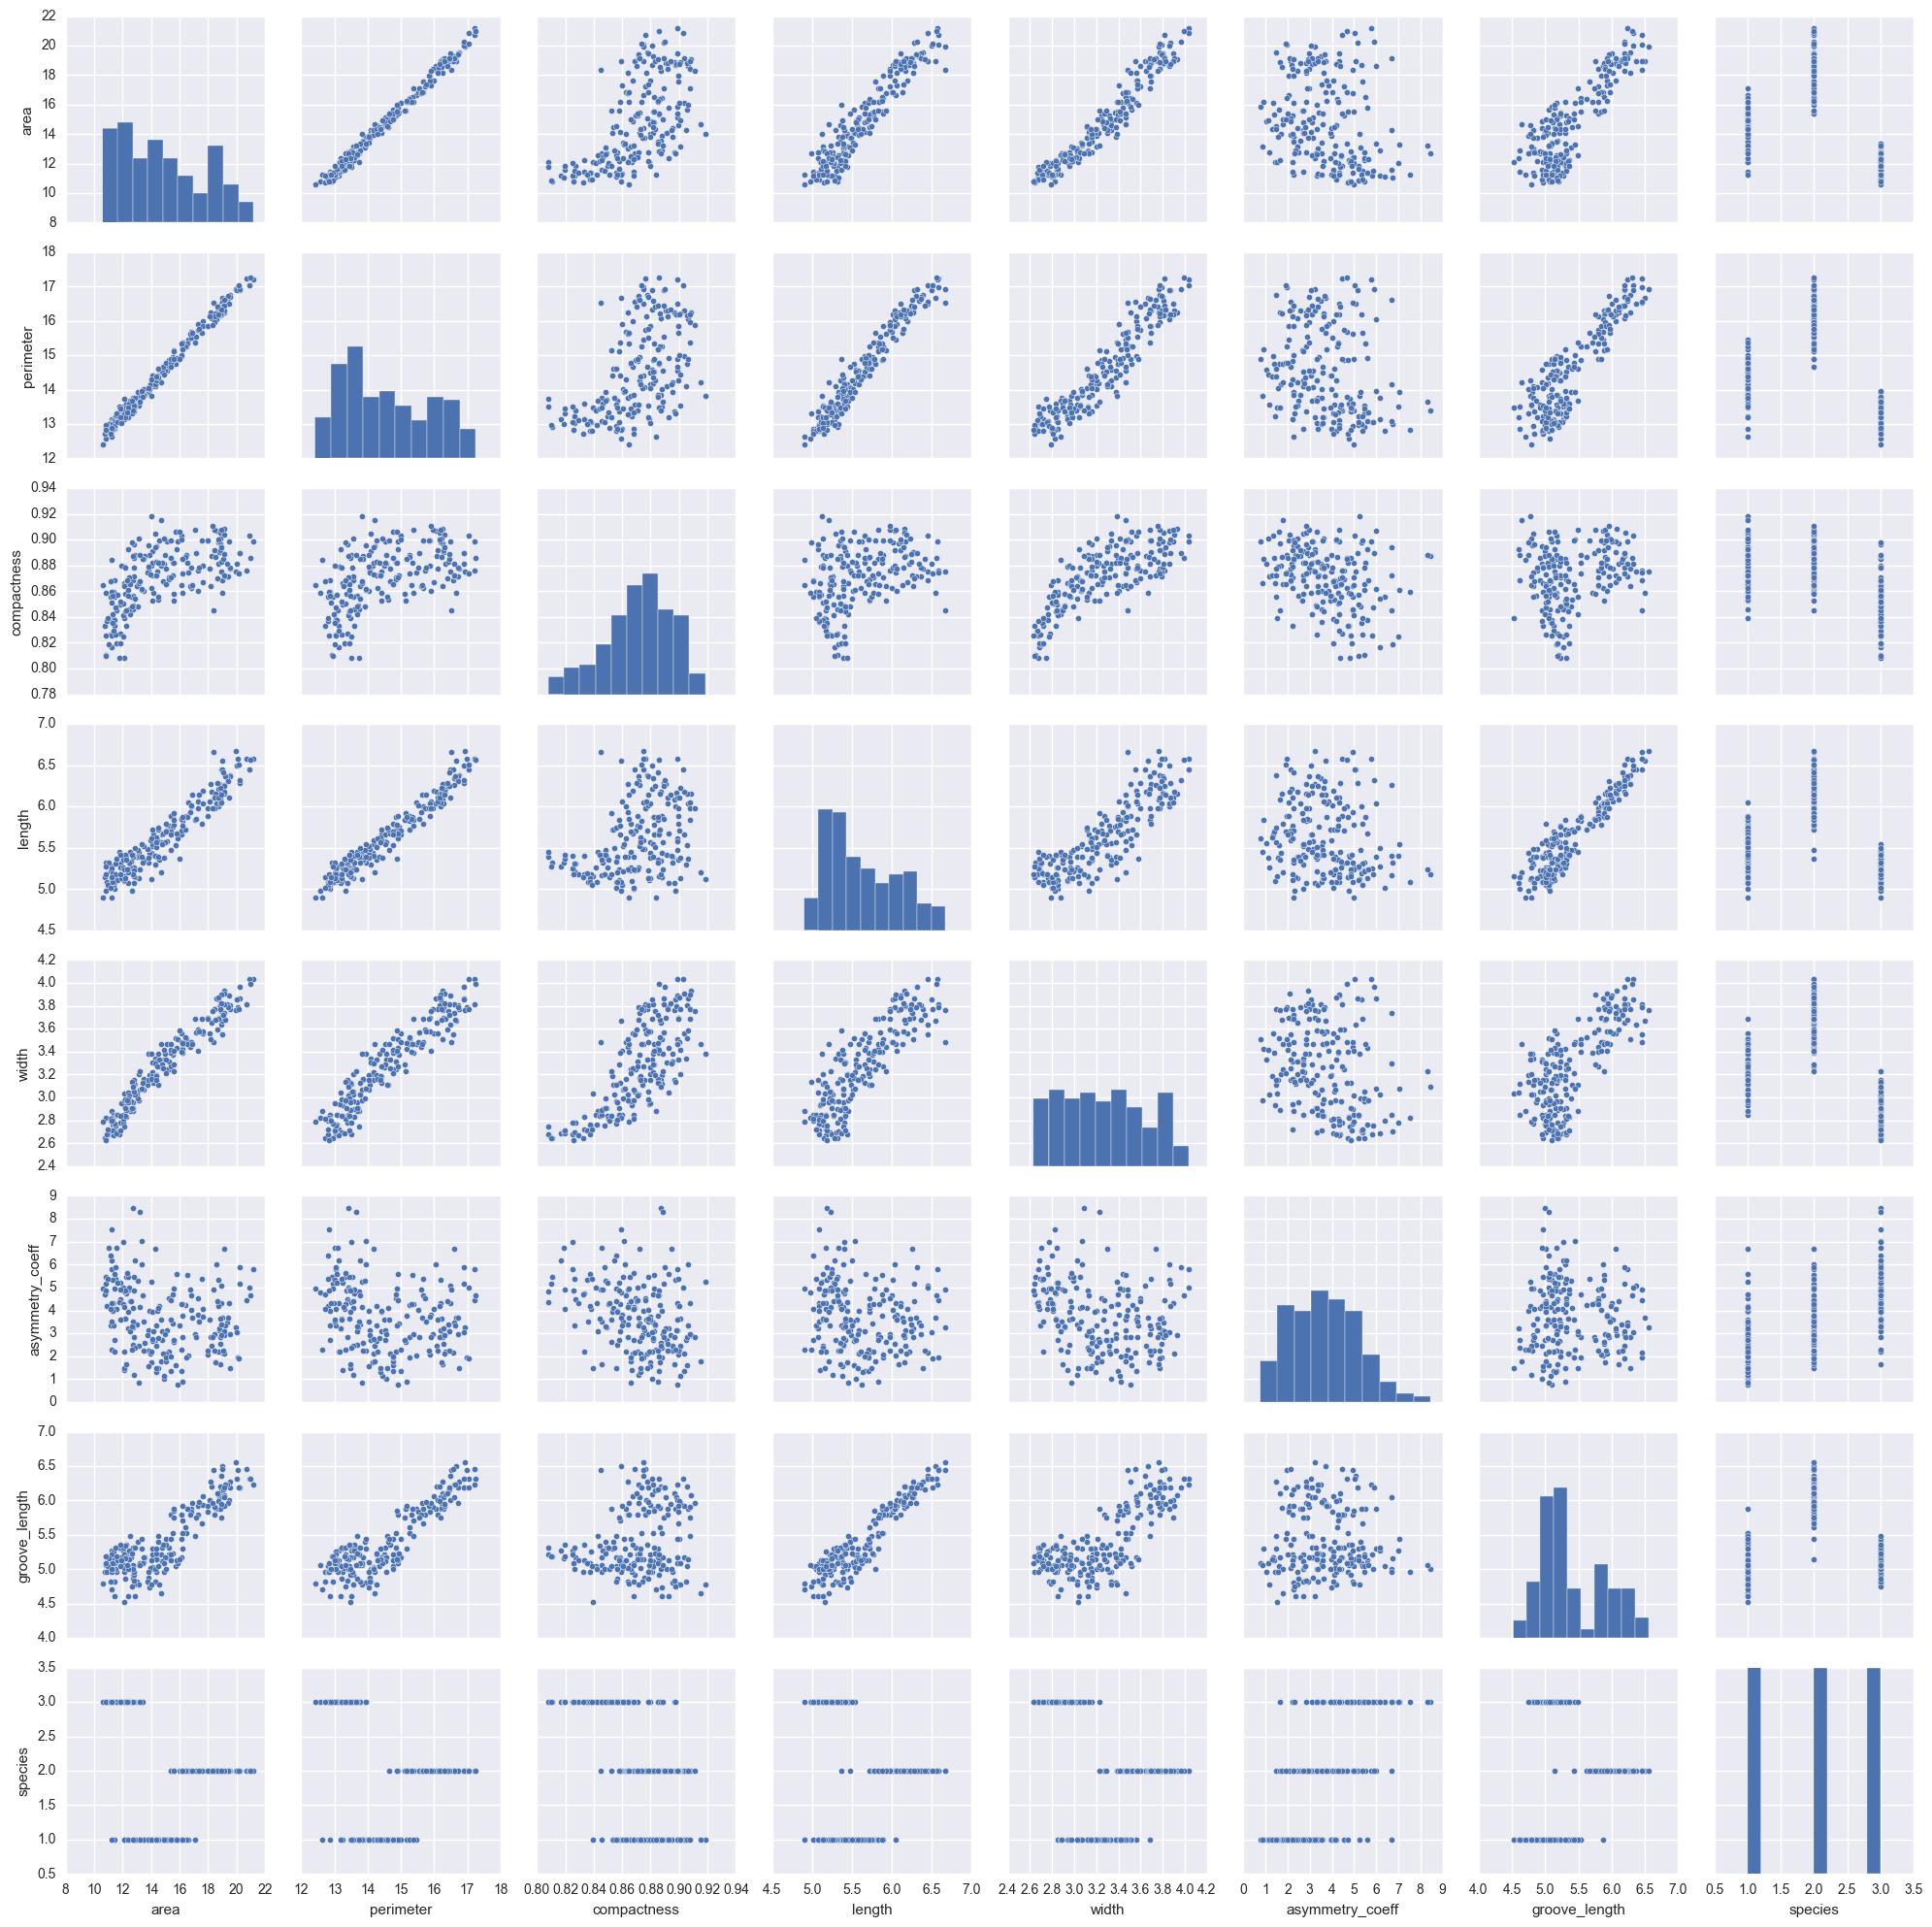

In [7]:
# Plot the Data to see the distributions/relationships
import seaborn as sns

sns.pairplot(seeds)
# Not having colors is not helpful

In [22]:
# Check for nulls
seeds.isnull().sum()
# there is a value for every position in the DF

area               0
perimeter          0
compactness        0
length             0
width              0
asymmetry_coeff    0
groove_length      0
species            0
dtype: int64

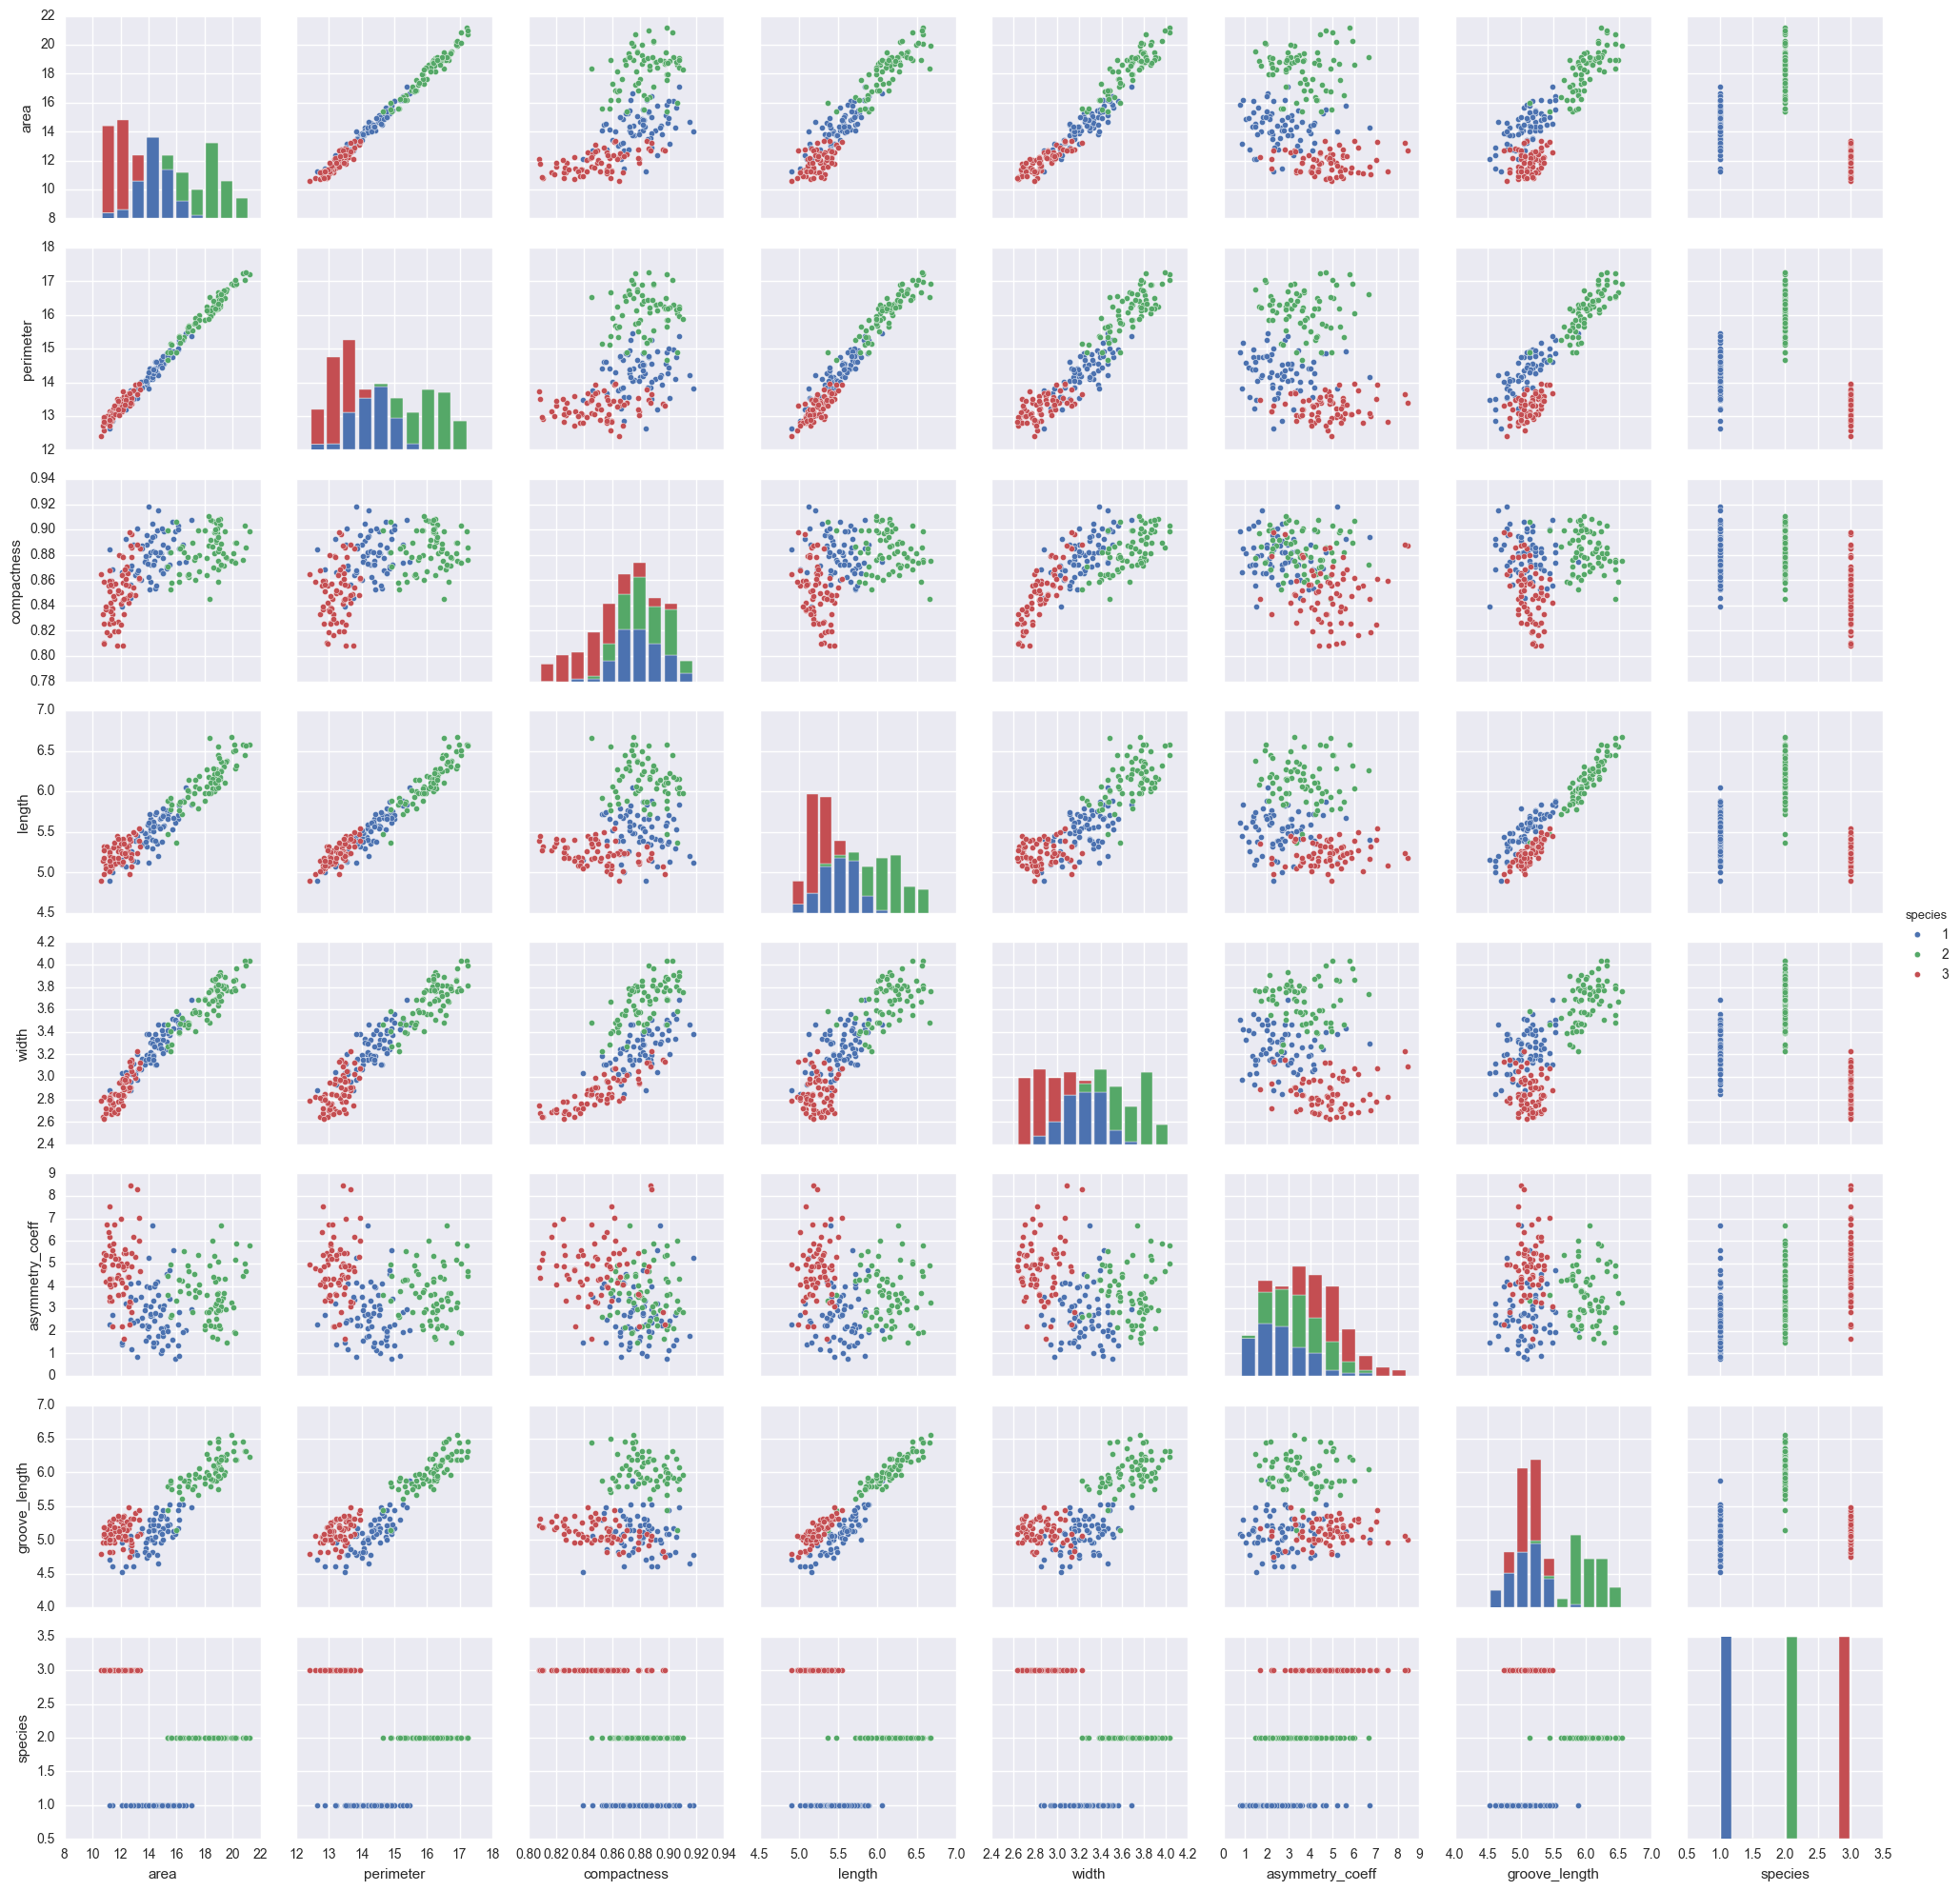

In [17]:
# Look at distributions, etc.
sns.pairplot(data = seeds, hue = 'species')
# classea appear to have a similar number of samples.
# Blue consistently looks like the divisor between the green and red classes.

In [18]:
seeds.species.value_counts()
# all classes are equally distributed. 

3    70
2    70
1    70
Name: species, dtype: int64

In [19]:
# Check datatypes
seeds.dtypes
# We got an odd-ball, that species guy.

area               float64
perimeter          float64
compactness        float64
length             float64
width              float64
asymmetry_coeff    float64
groove_length      float64
species              int64
dtype: object

**Section III: Prep for Clustering**

In [6]:
# drop 'species', which is currently acting as a target (categorical)
x = seeds.drop('species', axis = 1)
y = seeds.species

In [37]:
# Scale the data
from sklearn.preprocessing import normalize

xn = normalize(x)

**Section IV: Clustering Analysis**

Cluster the Data to our our target groups.

We know that there are 3 actual classes, however knowing things isn't fun.  Lets shake things up a bit!

Lets try using 2,4 and 6 clusters splits.  Lets run our clustering algorith with each of those k values.

In [38]:
from sklearn.cluster import KMeans
# 2 Clusters
k_mean2 = KMeans(n_clusters = 2)
k_mean2.fit(xn)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [39]:
# 4 Clusters
k_mean4 = KMeans(n_clusters = 4)
k_mean4.fit(xn)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [40]:
# 6 Clusters
k_mean6 = KMeans(n_clusters = 6)
k_mean6.fit(xn)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

Get the labels and centroids

In [41]:
# Labels and centroids for 2 Clusters
labels_2 = k_mean2.labels_
print labels_2
clusters_2 = k_mean2.cluster_centers_
clusters_2

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1]


array([[ 0.66929175,  0.63185432,  0.03700914,  0.24244146,  0.14335061,
         0.12355609,  0.2308226 ],
       [ 0.59452087,  0.65538982,  0.04178222,  0.2581907 ,  0.14176089,
         0.24787804,  0.25185439]])

In [42]:
# Labels and centroids for 4 Clusters

labels_4 = k_mean4.labels_
print labels_4
clusters_4 = k_mean4.cluster_centers_
clusters_4

[1 1 3 3 1 1 3 3 1 1 0 1 3 3 3 0 2 1 1 3 3 3 1 3 1 1 3 3 3 3 1 3 3 3 1 1 1
 1 3 2 3 3 3 0 3 1 1 3 3 1 3 0 3 3 1 1 3 1 1 3 3 3 3 3 1 3 1 3 1 3 0 0 0 1
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1
 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 2 2 2 2 2 2 3 2
 3 2 2 2 2 3 2 2 3 2 2 2 3 2 2 2 2 3 2 3 2 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2
 2 2 2 2 2 2 2 3 2 2 2 2 2 3 3 2 3 2 2 3 3 2 2 3 2]


array([[ 0.68246421,  0.6127239 ,  0.03410852,  0.23350594,  0.13945332,
         0.17492916,  0.22699804],
       [ 0.68364239,  0.62612096,  0.03584028,  0.23952297,  0.14266939,
         0.08734826,  0.22865892],
       [ 0.58749248,  0.65603307,  0.04202818,  0.2591535 ,  0.14127454,
         0.26205395,  0.25328319],
       [ 0.62914261,  0.65937803,  0.04169991,  0.25621136,  0.14726131,
         0.14335932,  0.24070471]])

In [43]:
# Labels and centroids for 6 Clusters

labels_6 = k_mean6.labels_
print labels_6
clusters_6 = k_mean6.cluster_centers_
clusters_6

[1 1 1 1 1 1 5 1 1 1 2 1 5 5 5 2 0 1 1 5 5 1 1 1 1 1 5 5 1 5 1 2 5 1 1 1 1
 3 1 4 1 1 1 2 1 1 1 1 1 1 5 2 5 5 1 1 1 1 1 1 5 5 5 5 1 1 1 1 1 5 2 2 2 3
 2 2 2 2 2 3 2 2 2 3 3 3 3 3 2 2 3 3 3 2 2 2 3 3 3 3 2 3 2 3 3 3 3 2 3 3 3
 3 3 2 2 3 2 3 3 3 2 3 2 3 2 2 2 3 3 2 3 3 2 2 2 2 2 1 1 2 0 4 0 0 0 4 5 0
 5 4 0 4 0 5 0 4 5 0 0 0 5 0 0 0 4 5 0 5 0 5 4 4 0 4 0 0 0 0 4 1 0 0 0 0 4
 0 0 0 4 0 4 0 5 0 0 0 0 0 5 5 0 1 0 4 5 5 0 4 5 0]


array([[ 0.5919045 ,  0.6606496 ,  0.04235383,  0.260641  ,  0.14212351,
         0.23933437,  0.25481913],
       [ 0.65444703,  0.649747  ,  0.03985989,  0.24983848,  0.14781626,
         0.09157449,  0.2321617 ],
       [ 0.68039618,  0.61384606,  0.03435695,  0.23392257,  0.13983577,
         0.17824021,  0.22699241],
       [ 0.70196952,  0.60866227,  0.0330971 ,  0.23185674,  0.13931533,
         0.10189549,  0.22688768],
       [ 0.57646241,  0.64449176,  0.04121406,  0.25543474,  0.13915214,
         0.31885291,  0.24944336],
       [ 0.61953483,  0.66223574,  0.0420511 ,  0.25900292,  0.14545535,
         0.16204158,  0.24514403]])

Compute the Silhouette Score to measure your analysis

In [35]:
from sklearn.metrics import silhouette_score

In [44]:
# A Silhouette of 0.5 is not bad considering the range for scores is -1 to 1.
silhouette_score(xn, labels_2)

0.50144852045607891

In [45]:
# Double our clusters saw a pretty large drop in silhouette score.
silhouette_score(xn, labels_4)

0.3801962457143705

In [46]:
# A further addition of 2 clsuters dropped out score again but not as significatly.
silhouette_score(xn, labels_6)

0.35710130623867054

I want to see how this visually turned out.

It looks like the plot of Length vs. Groove Length was a good at homogenously visualizing the data.

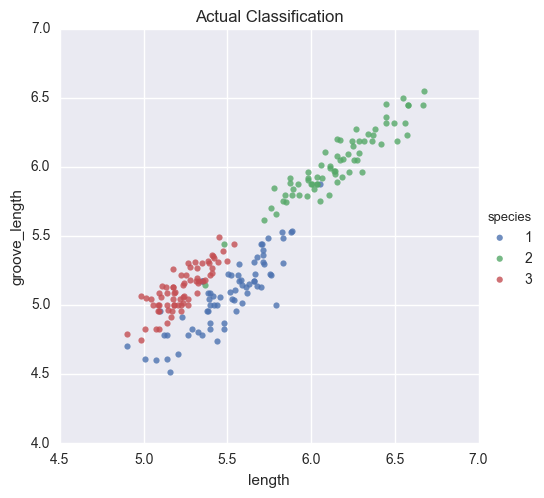

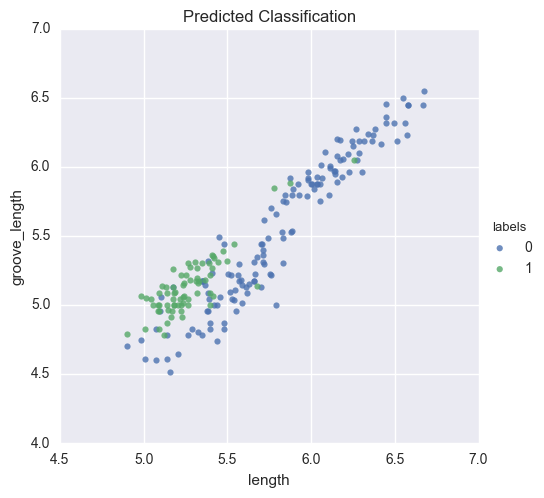

In [78]:
#length x groove_length
seeds2 = seeds
seeds2['labels'] = labels_2

sns.lmplot(x = 'length', y = 'groove_length', data = seeds2, hue = 'species',fit_reg = False)
plt.title('Actual Classification')

sns.lmplot(x = 'length', y = 'groove_length', data = seeds2, hue = 'labels',fit_reg = False)
plt.title('Predicted Classification')

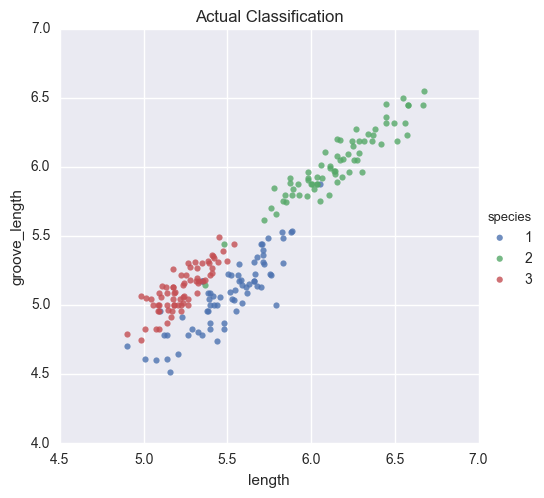

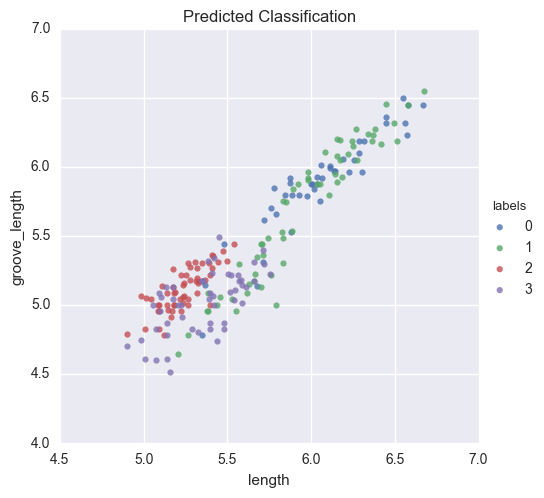

In [76]:
seeds4 = seeds
seeds4['labels'] = labels_4

sns.lmplot(x = 'length', y = 'groove_length', data = seeds4, hue = 'species',fit_reg = False)
plt.title('Actual Classification')

sns.lmplot(x = 'length', y = 'groove_length', data = seeds4, hue = 'labels',fit_reg = False)
plt.title('Predicted Classification')

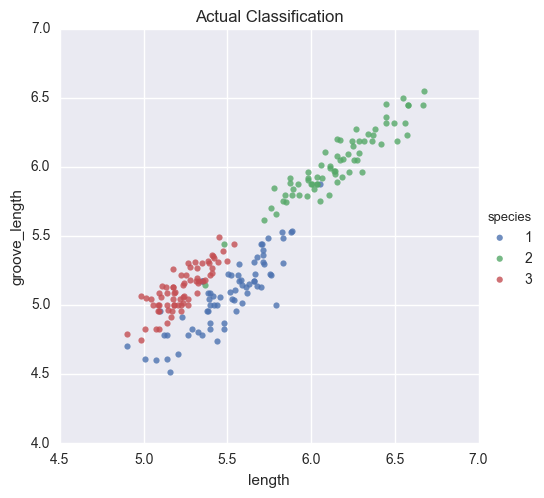

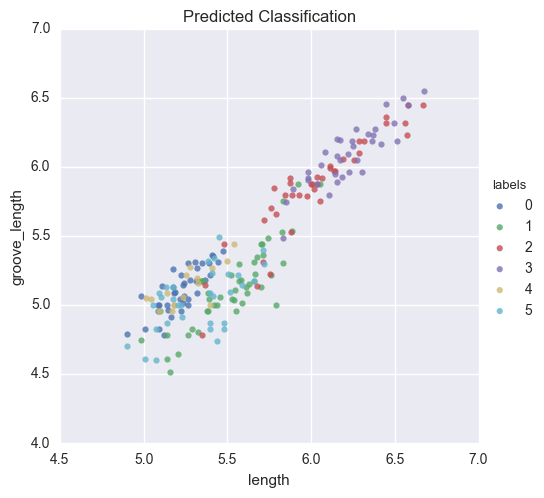

In [77]:
seeds6 = seeds
seeds6['labels'] = labels_6

sns.lmplot(x = 'length', y = 'groove_length', data = seeds6, hue = 'species',fit_reg = False)
plt.title('Actual Classification')

sns.lmplot(x = 'length', y = 'groove_length', data = seeds6, hue = 'labels',fit_reg = False)
plt.title('Predicted Classification')

In [73]:
k_mean3 = KMeans(n_clusters = 3)
k_mean3.fit(xn)

labels_3 = k_mean3.labels_
print labels_3
clusters_3 = k_mean3.cluster_centers_
clusters_3

[0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 2 0 0 2 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0
 0 1 2 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 2 2 2 2 2 2 0 2
 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 0 2 2 2 1 2 2 2 2]


array([[ 0.67054001,  0.63555118,  0.03754245,  0.24369327,  0.14465753,
         0.09404806,  0.2312844 ],
       [ 0.66509806,  0.62750951,  0.03646614,  0.24114117,  0.1415701 ,
         0.16937951,  0.23066162],
       [ 0.5890222 ,  0.65769788,  0.04218078,  0.25964956,  0.14174127,
         0.25228245,  0.25373376]])

In [74]:
silhouette_score(xn, labels_3)

0.36029385561045923

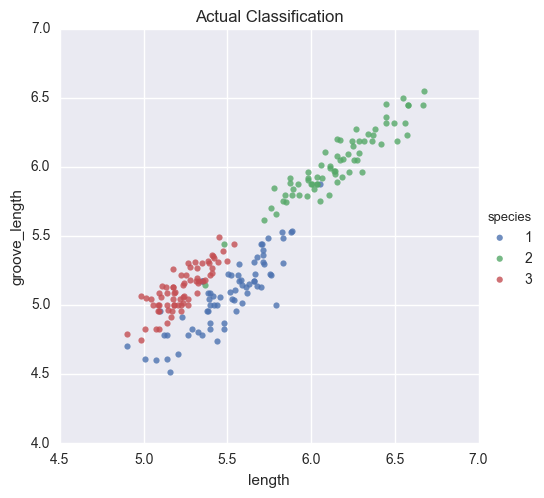

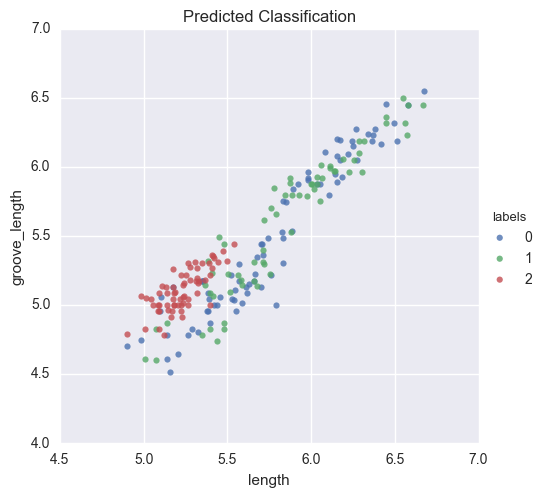

In [75]:
seeds3 = seeds
seeds3['labels'] = labels_3

sns.lmplot(x = 'length', y = 'groove_length', data = seeds3, hue = 'species',fit_reg = False)
plt.title('Actual Classification')

sns.lmplot(x = 'length', y = 'groove_length', data = seeds3, hue = 'labels',fit_reg = False)
plt.title('Predicted Classification')